In [105]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as shc
import warnings
import os
import scipy.cluster.hierarchy as sch
import category_encoders as ce

## Data Exploration

In [30]:
df = pd.read_csv('../data/income_evaluation.csv')
df = df[4000:8000][:]
df = df.drop(columns=[' income', ' education-num', ' capital-gain', ' capital-loss'])
df.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country
4000,63,Private,171635,Bachelors,Married-civ-spouse,Sales,Husband,White,Male,40,United-States
4001,19,Private,376240,HS-grad,Never-married,Machine-op-inspct,Own-child,White,Male,42,United-States
4002,28,Private,157391,Bachelors,Never-married,Sales,Own-child,White,Female,40,United-States
4003,23,?,114357,Some-college,Never-married,?,Not-in-family,White,Male,40,United-States
4004,44,Private,178134,Prof-school,Never-married,Prof-specialty,Not-in-family,White,Female,40,United-States


In [31]:
df.shape

(4000, 11)

In [32]:
df.describe()

,age,fnlwgt,hours-per-week
count,4000.000000,4.000000e+03,4000.000000
mean,38.048500,1.904072e+05,40.453750
std,13.505452,1.047433e+05,12.487247
min,17.000000,1.939500e+04,1.000000
25%,27.000000,1.187312e+05,40.000000
50%,36.000000,1.787800e+05,40.000000
75%,47.000000,2.384310e+05,45.000000
max,90.000000,1.184622e+06,99.000000


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 4000 to 7999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              4000 non-null   int64 
 1    workclass       4000 non-null   object
 2    fnlwgt          4000 non-null   int64 
 3    education       4000 non-null   object
 4    marital-status  4000 non-null   object
 5    occupation      4000 non-null   object
 6    relationship    4000 non-null   object
 7    race            4000 non-null   object
 8    sex             4000 non-null   object
 9    hours-per-week  4000 non-null   int64 
 10   native-country  4000 non-null   object
dtypes: int64(3), object(8)
memory usage: 343.9+ KB


In [34]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' marital-status',
       ' occupation', ' relationship', ' race', ' sex', ' hours-per-week',
       ' native-country'],
      dtype='object')

## Jumlah Missing Values

In [35]:
df.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 hours-per-week    0
 native-country    0
dtype: int64

In [36]:
(df.isnull().sum() / df.shape[0] * 100.00)

age                0.0
 workclass         0.0
 fnlwgt            0.0
 education         0.0
 marital-status    0.0
 occupation        0.0
 relationship      0.0
 race              0.0
 sex               0.0
 hours-per-week    0.0
 native-country    0.0
dtype: float64

In [10]:
# print((df[' capital-gain'] == 0).sum())
# print((df[' capital-loss'] == 0).sum())

3678
3822


## Data Visualization

In [11]:
plt.style.use('fivethirtyeight')

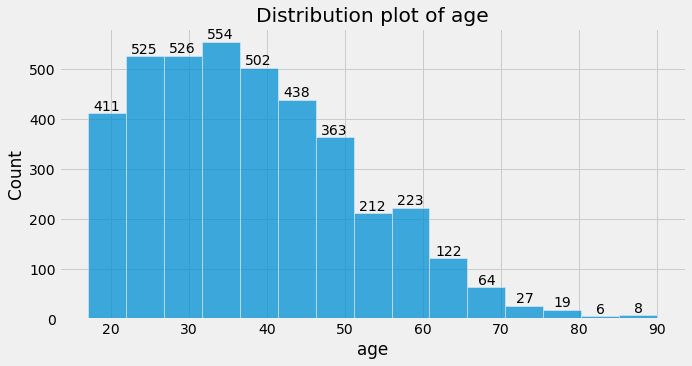

In [12]:
plt.figure(1 , figsize = (10 , 5))
g = sns.histplot(df['age'] , bins = 15)
g.bar_label(g.containers[1])
plt.title('Distribution plot of age')
plt.show()

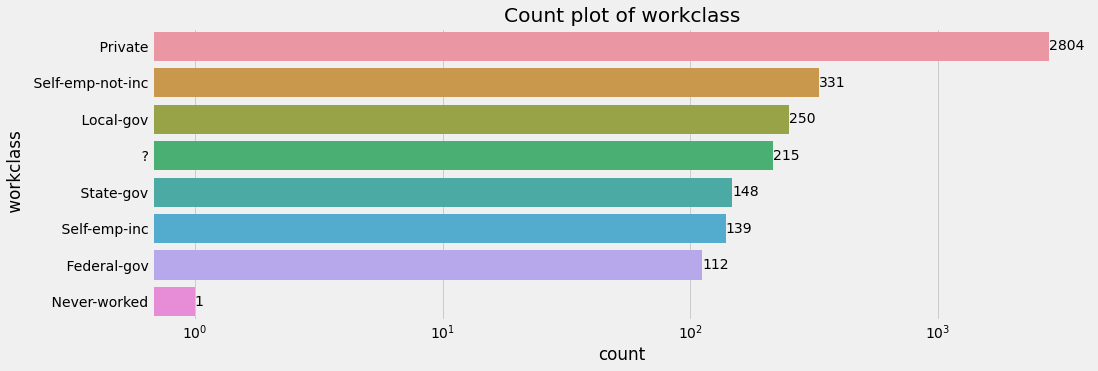

In [37]:
plt.figure(1 , figsize = (15 , 5))
g = sns.countplot(y = ' workclass' , data = df, order=df[' workclass'].value_counts().index)
g.bar_label(g.containers[0])
g.set_xscale('log')
plt.title('Count plot of workclass')
plt.show()

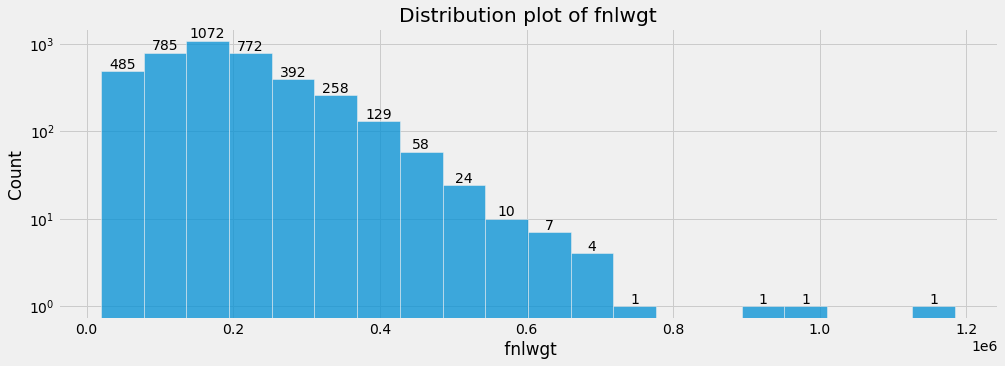

In [14]:
plt.figure(1 , figsize = (15 , 5))
g = sns.histplot(df[' fnlwgt'] , bins = 20)
g.set_yscale('log')
g.bar_label(g.containers[1])
plt.title('Distribution plot of fnlwgt')
plt.show()

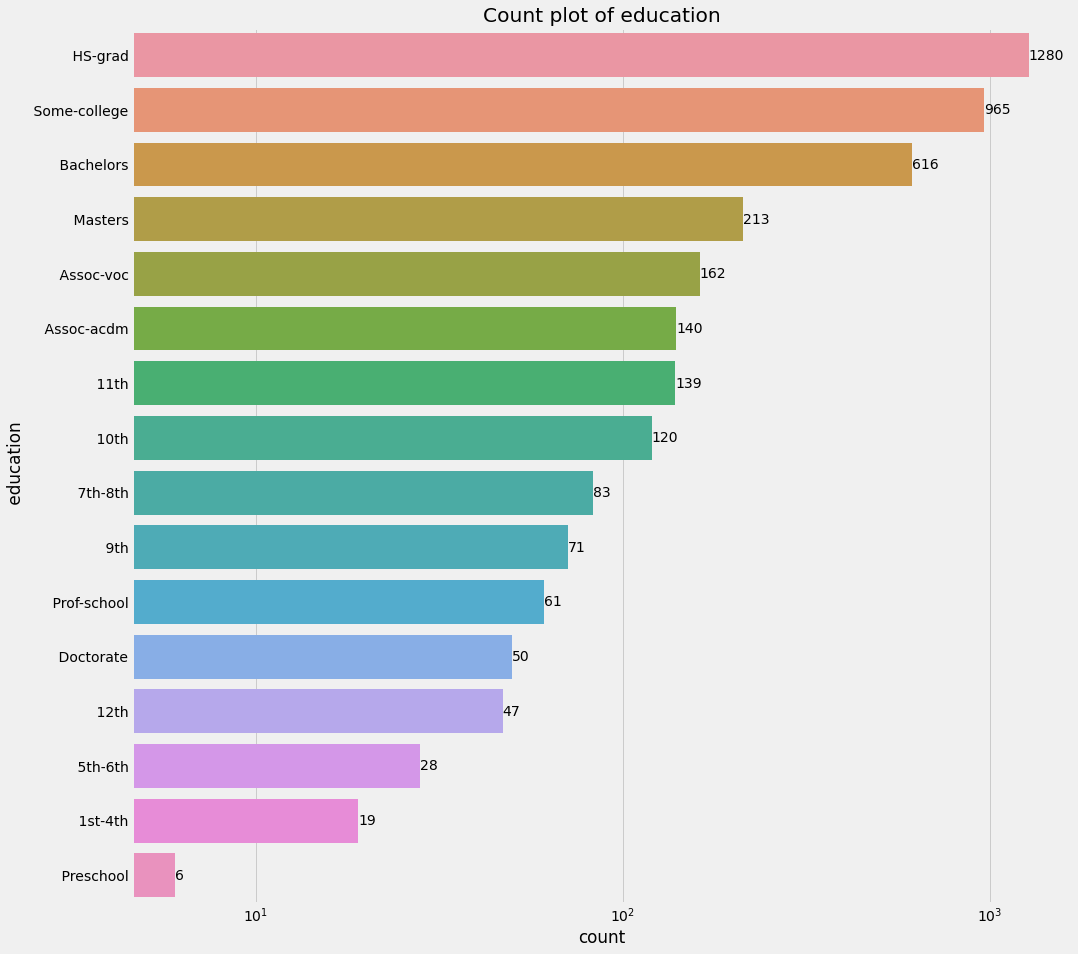

In [38]:
plt.figure(1 , figsize = (15 , 15))
g = sns.countplot(y = ' education' , data = df, order=df[' education'].value_counts().index)
g.bar_label(g.containers[0])
g.set_xscale('log')
plt.title('Count plot of education')
plt.show()

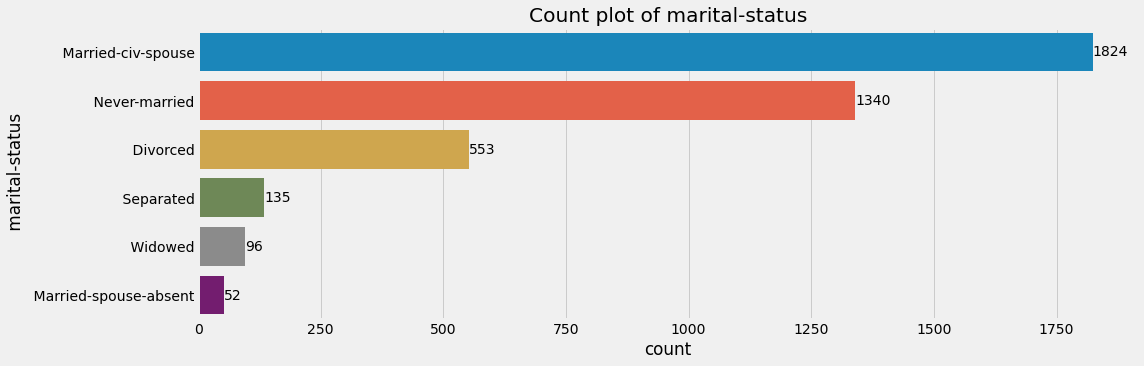

In [16]:
plt.figure(1 , figsize = (15 , 5))
g = sns.countplot(y = ' marital-status' , data = df, order=df[' marital-status'].value_counts().index)
g.bar_label(g.containers[0])
plt.title('Count plot of marital-status')
plt.show()

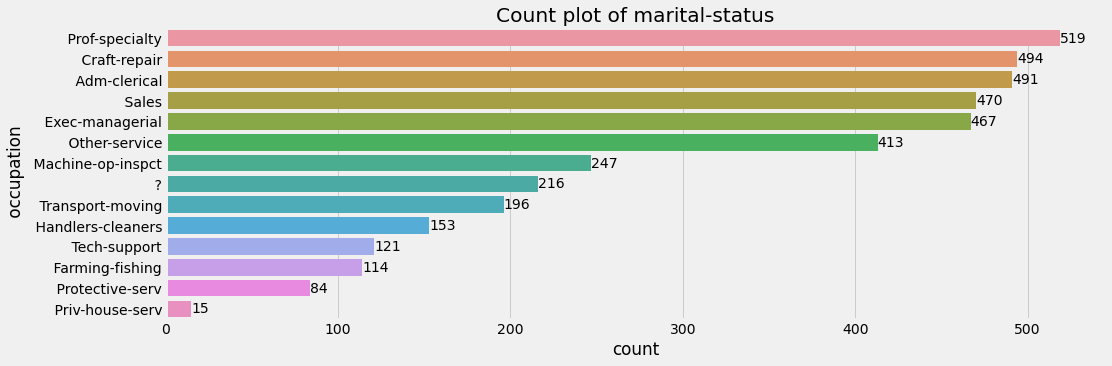

In [17]:
plt.figure(1 , figsize = (15 , 5))
g = sns.countplot(y = ' occupation' , data = df, order=df[' occupation'].value_counts().index)
g.bar_label(g.containers[0])
plt.title('Count plot of marital-status')
plt.show()

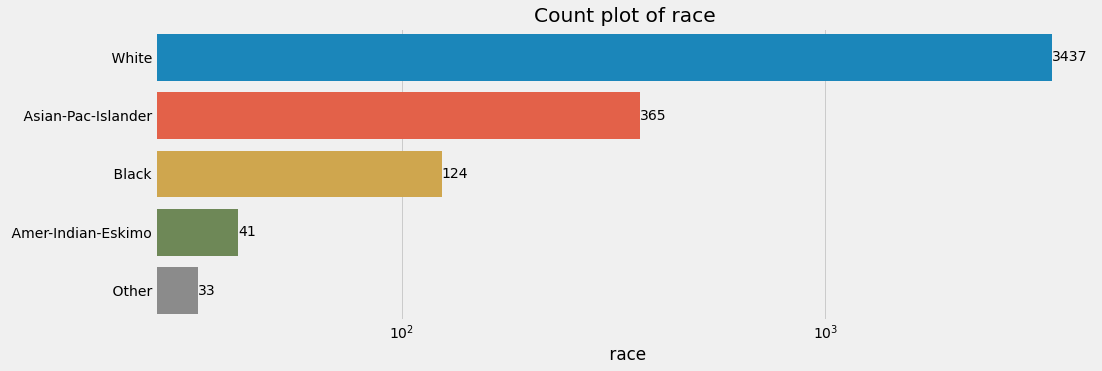

In [18]:
plt.figure(1 , figsize = (15 , 5))
g = sns.barplot(x=df[' race'].value_counts(), y=df[' race'].unique())
g.set_xscale('log')
g.bar_label(g.containers[0])
plt.title('Count plot of race')
plt.show()

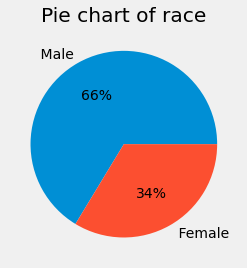

In [19]:
plt.pie(df[' sex'].value_counts(), labels=df[' sex'].unique(), autopct='%.0f%%')
plt.title('Pie chart of race')
plt.show()

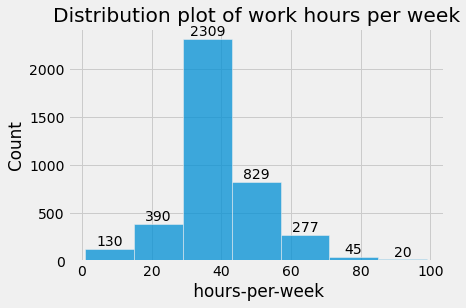

In [22]:
g = sns.histplot(df[' hours-per-week'] , bins = 7)
g.bar_label(g.containers[1])
plt.title('Distribution plot of work hours per week')
plt.show()

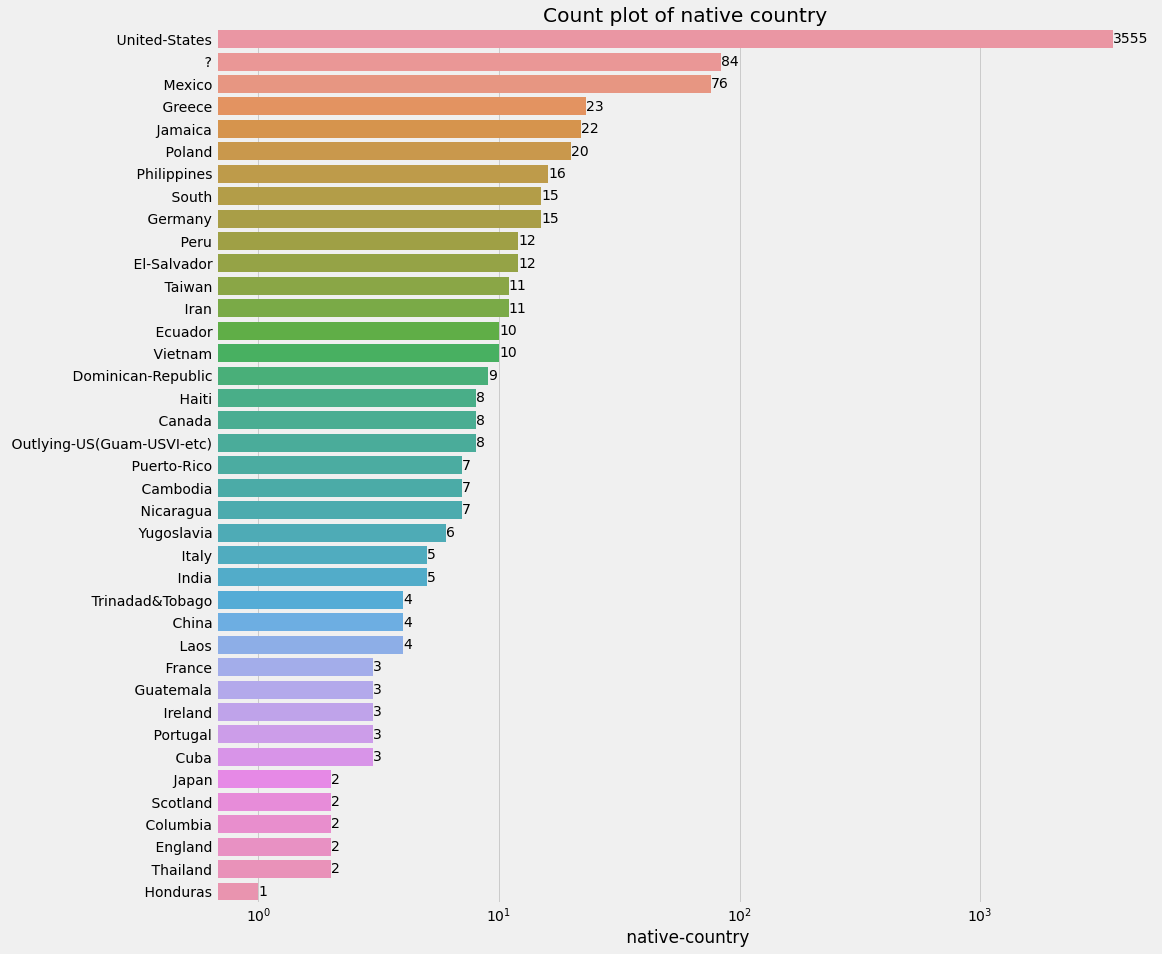

In [39]:
plt.figure(1 , figsize = (15 , 15))
g = sns.barplot(x=df[' native-country'].value_counts(), y=df[' native-country'].unique())
g.set_xscale('log')
g.bar_label(g.containers[0])
plt.title('Count plot of native country')
plt.show()

## Data Encoding

In [49]:
encoder = ce.BinaryEncoder()

In [74]:
new_df = ce.BinaryEncoder().fit_transform(df)
# new_df.head()
print(new_df.values)

[[63  0  0 ...  0  0  1]
 [19  0  0 ...  0  0  1]
 [28  0  0 ...  0  0  1]
 ...
 [35  0  0 ...  0  0  1]
 [47  0  1 ...  0  0  1]
 [20  0  0 ...  0  0  1]]


## Data Scaling

In [55]:
scaler = StandardScaler()

In [83]:
X = scaler.fit_transform(new_df.values)
X = preprocessing.normalize(new_df)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PCA 1', 'PCA 2'])
X = principalDf.values

## K-Means

In [85]:
# Ilustrasi elbow method untuk mencari jumlah cluster optimal

from sklearn.cluster import KMeans
wcss =[]
for i in range (1,7):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter =300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

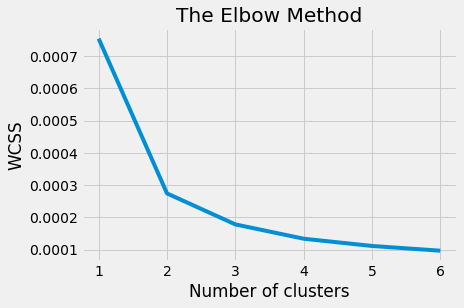

In [87]:
# Grafik elbow method
plt.plot(range(1,7),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [89]:
kmeans=KMeans(n_clusters= 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
Y_Kmeans = kmeans.fit_predict(X)
print(Y_Kmeans)

[0 0 0 ... 0 0 2]


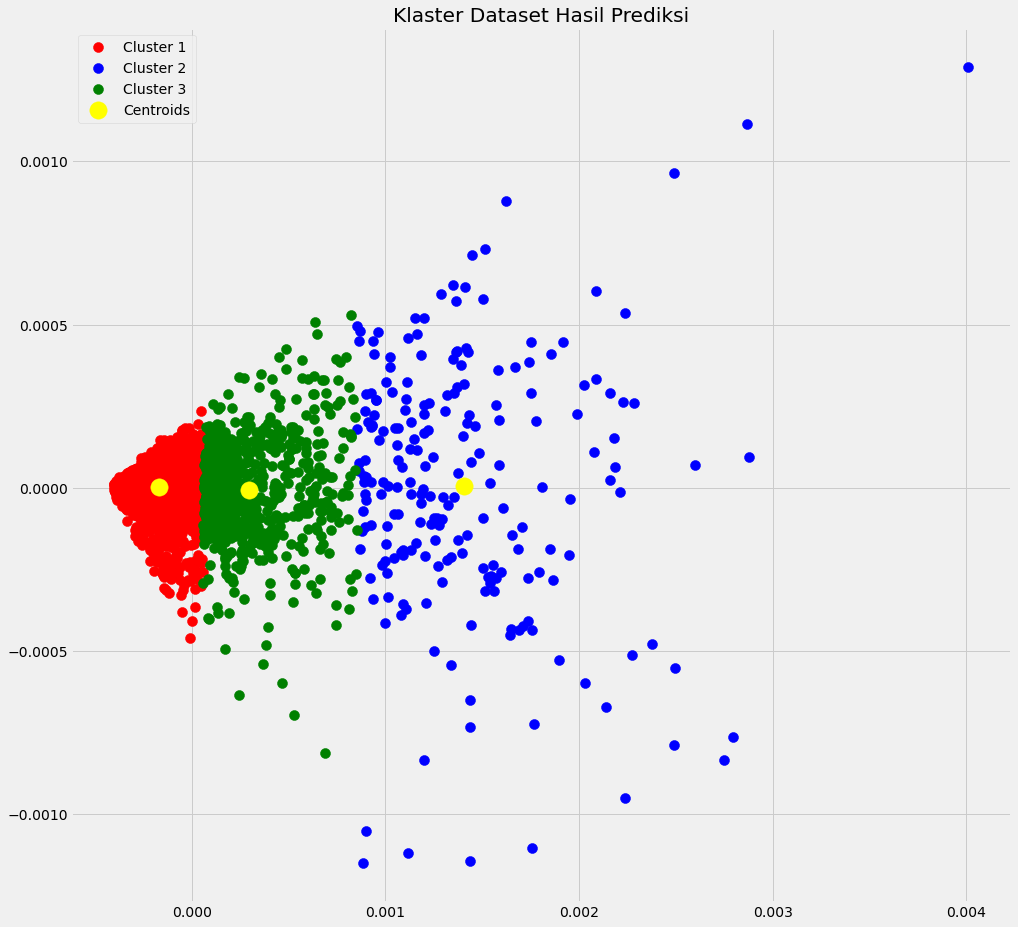

In [103]:
plt.figure(1 , figsize = (15 , 15))
# Visualising the clusters (cluster hasil prediksi)
plt.scatter(X[Y_Kmeans == 0, 0], X[Y_Kmeans == 0,1],s = 100, c='red', label = 'Cluster 1')
plt.scatter(X[Y_Kmeans == 1, 0], X[Y_Kmeans == 1,1],s = 100, c='blue', label = 'Cluster 2')
plt.scatter(X[Y_Kmeans == 2, 0], X[Y_Kmeans == 2,1],s = 100, c='green', label = 'Cluster 3')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'Centroids')

plt.title('Klaster Dataset Hasil Prediksi')
plt.legend()
plt.show()

In [106]:
score_kmeans = silhouette_score(X, Y_Kmeans)
print(score_kmeans)

0.5917333559412382


## Hierarchical

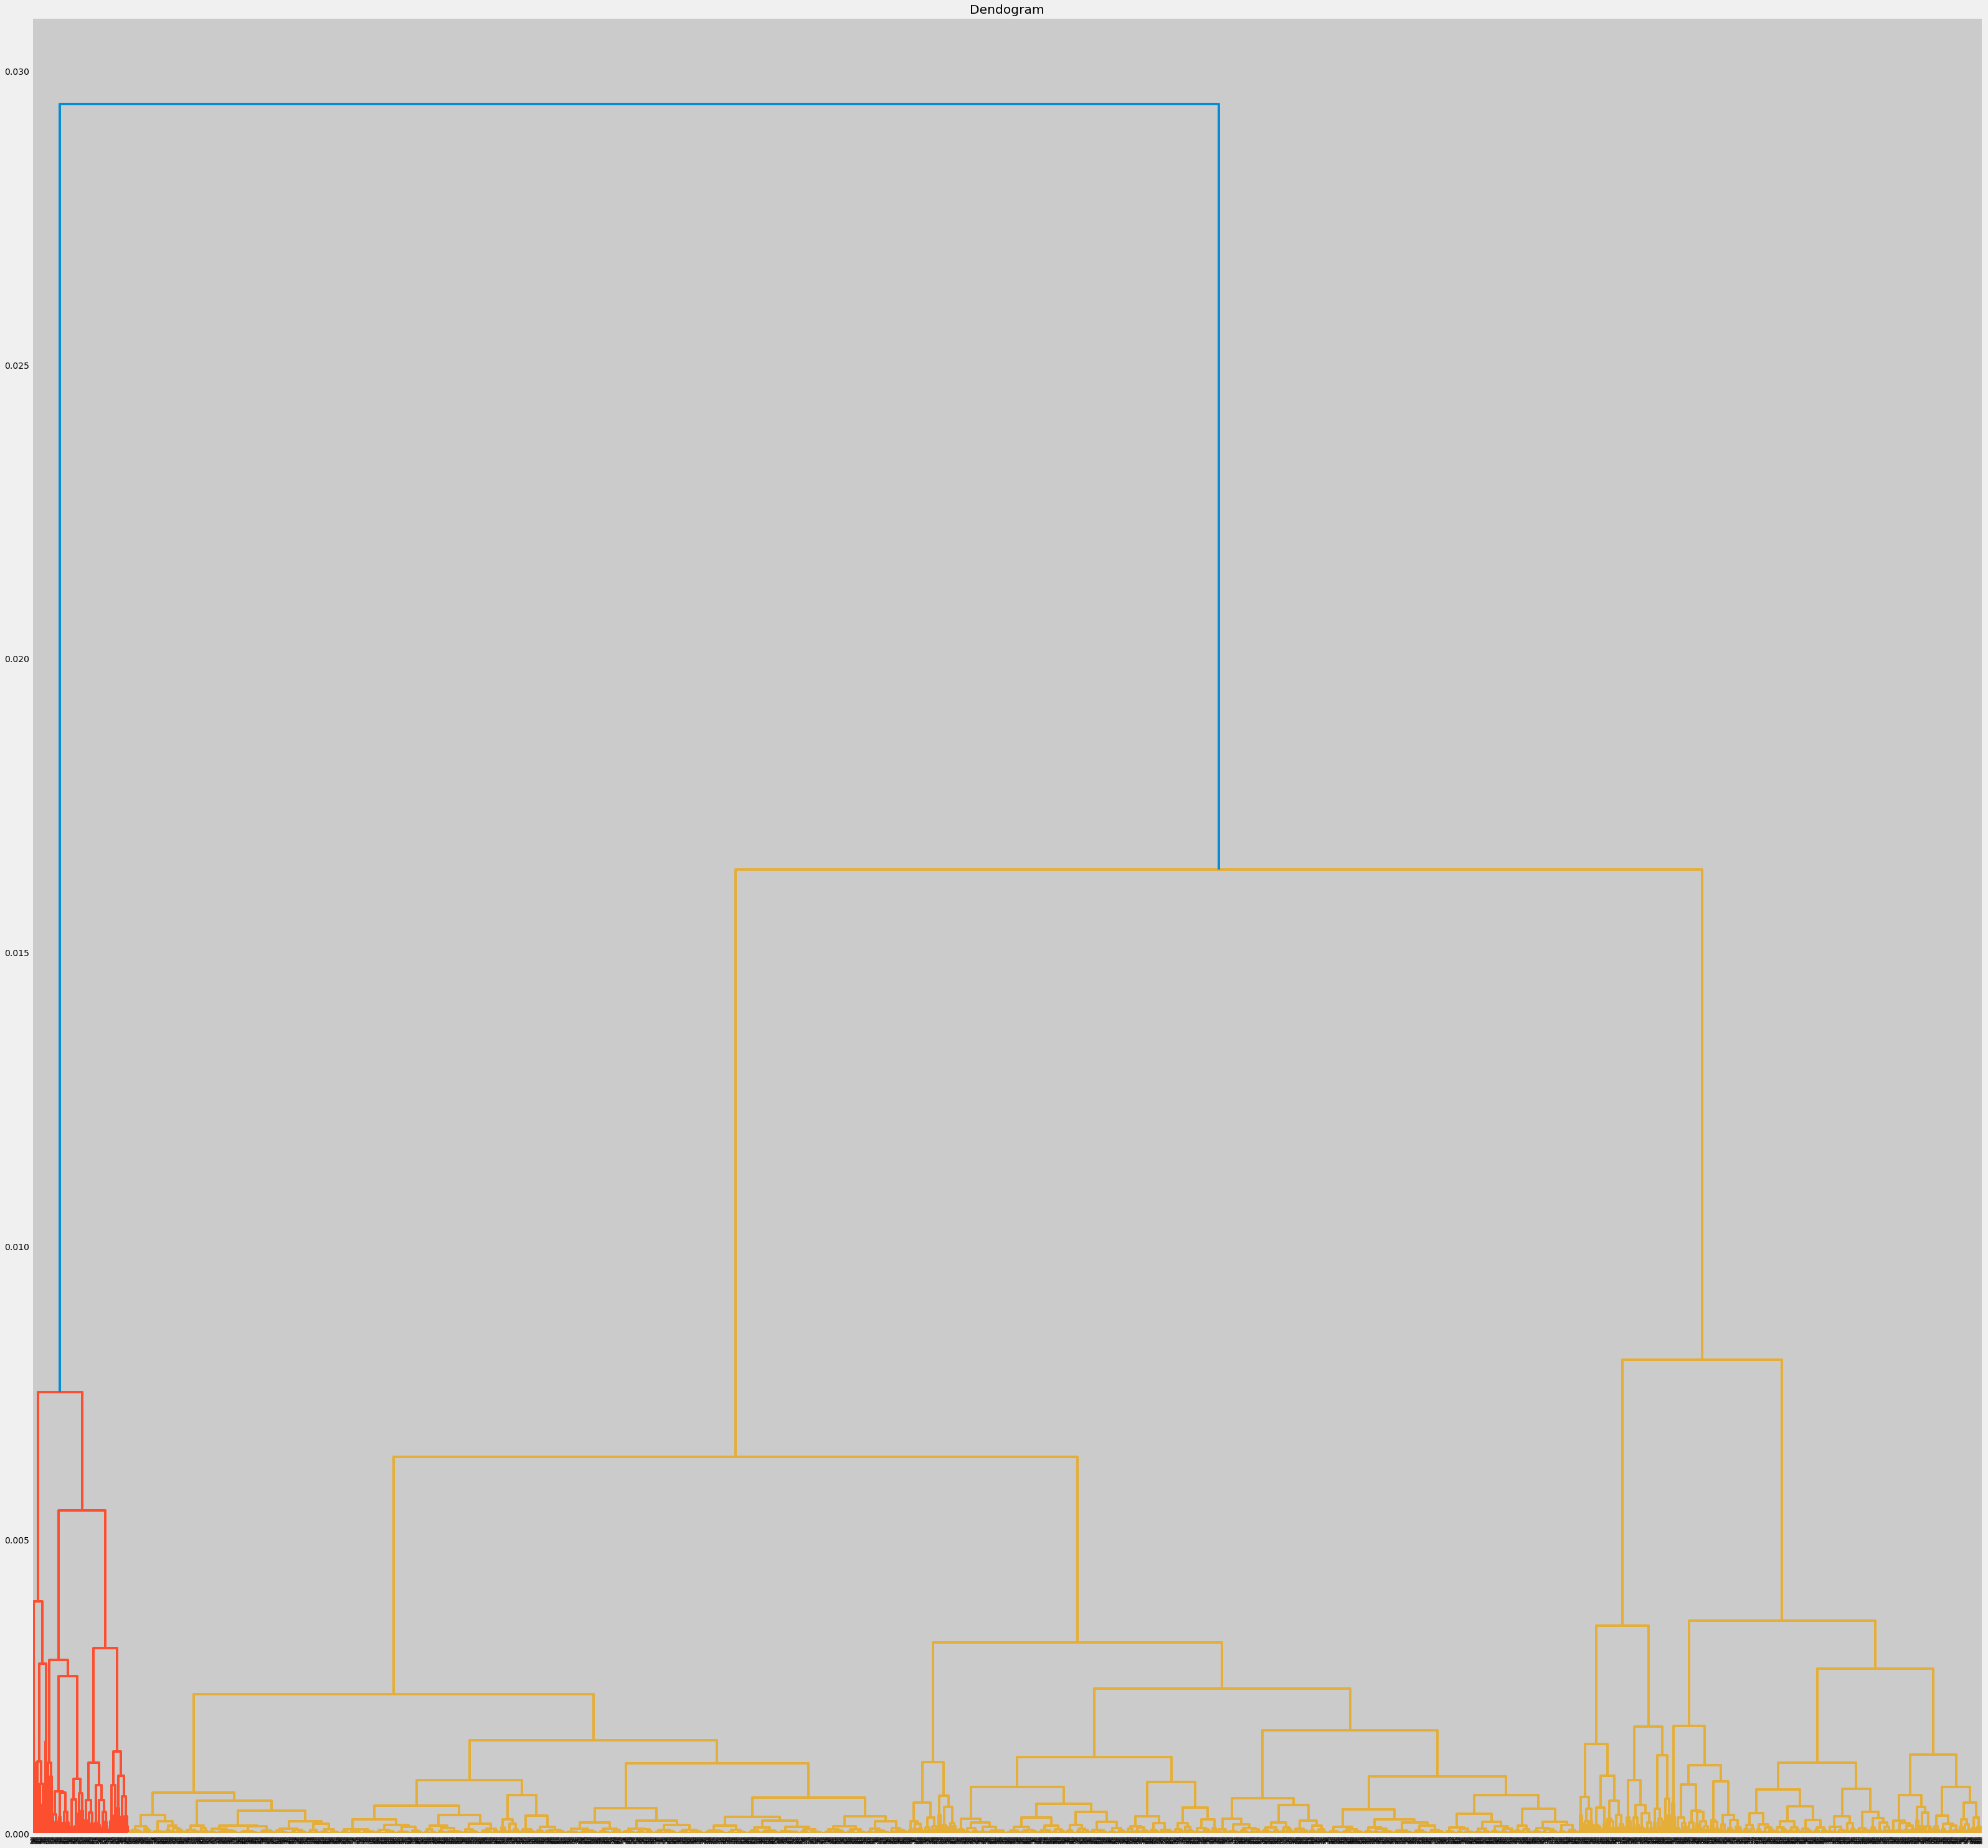

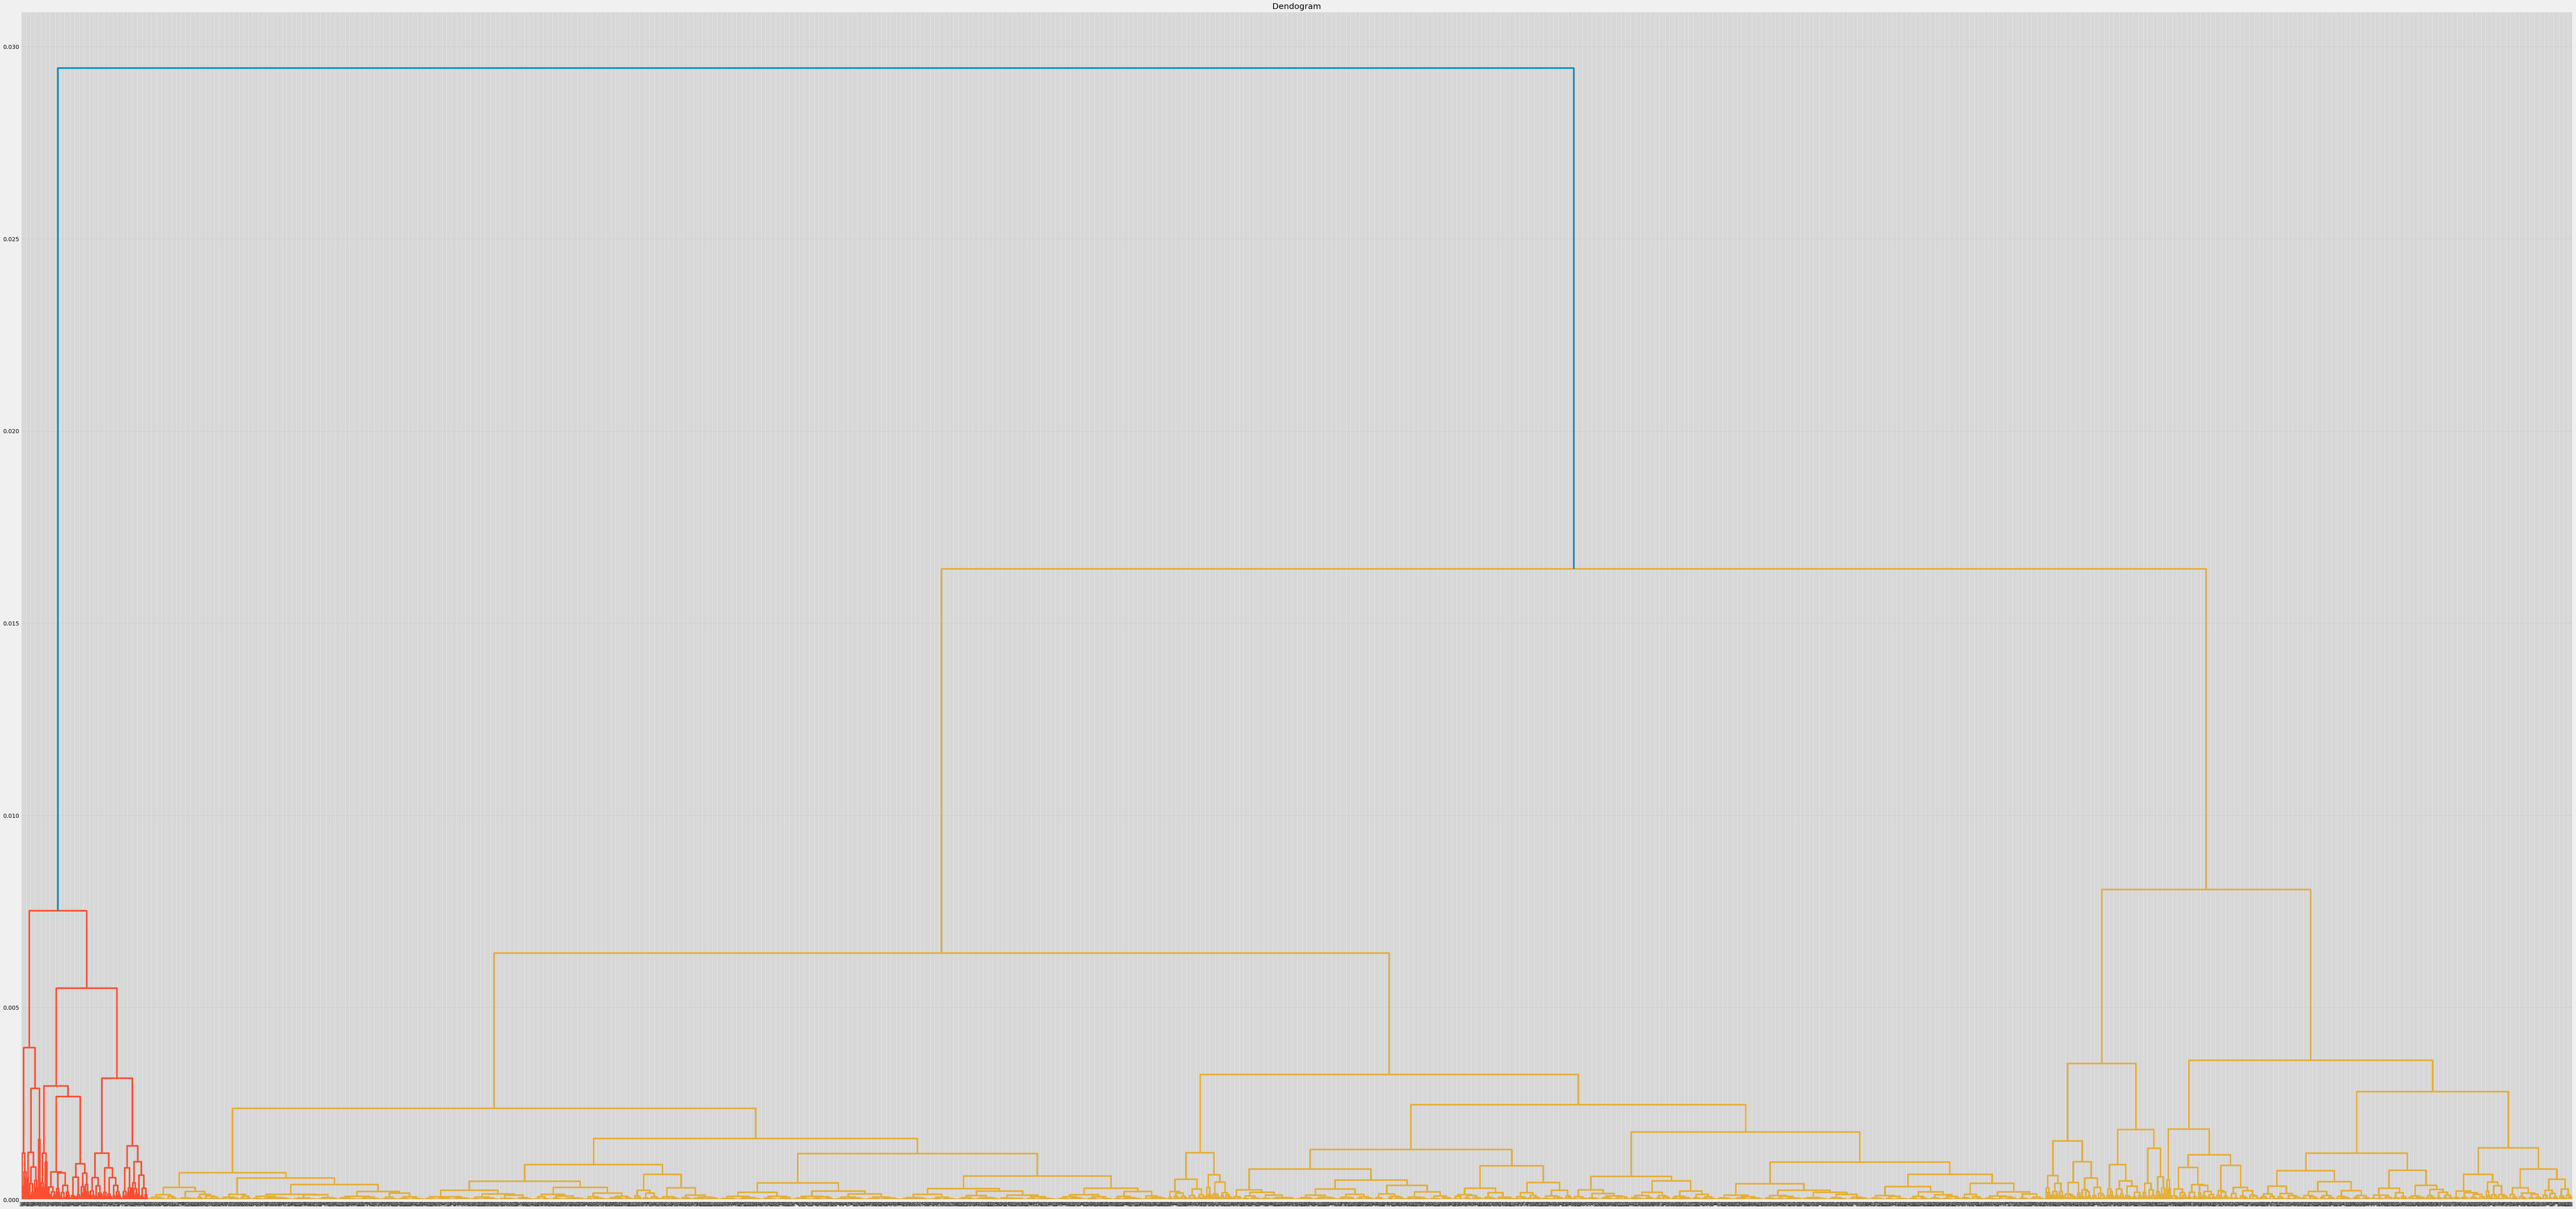

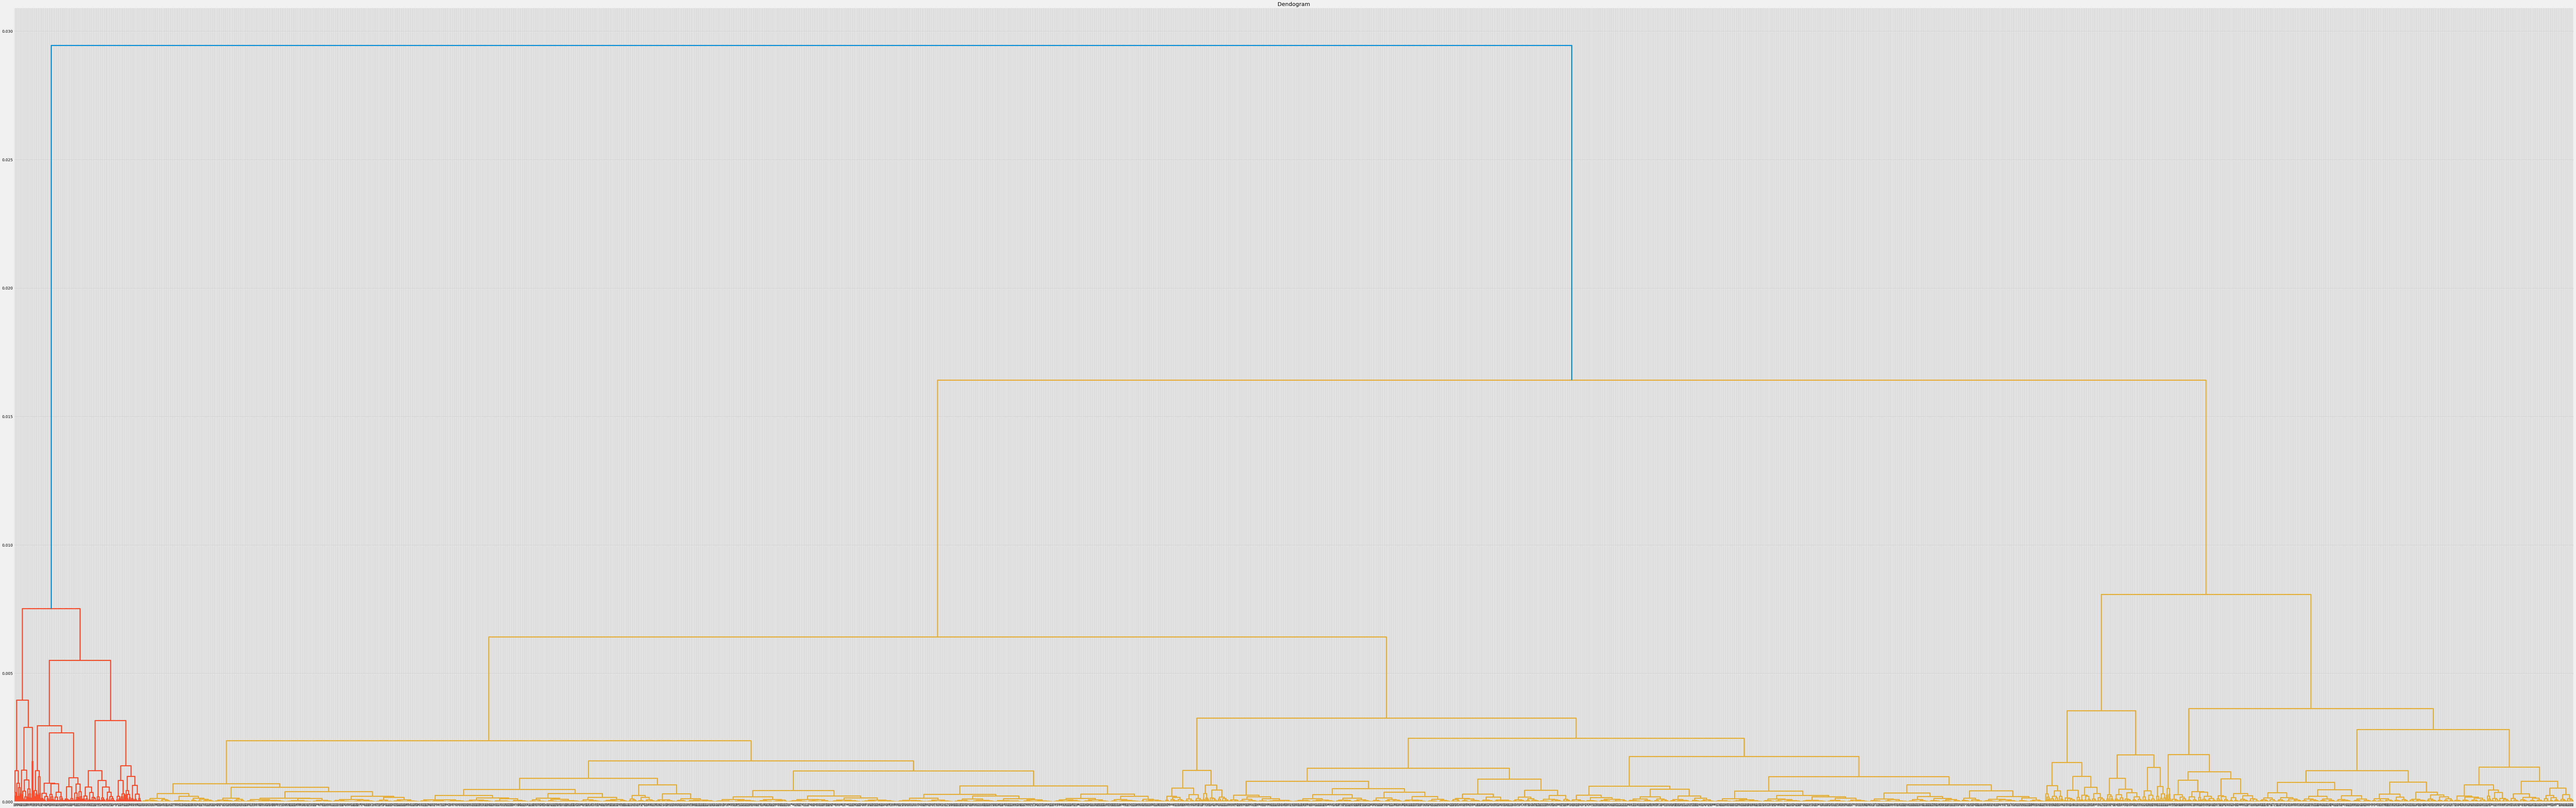

In [102]:
plt.figure(1 , figsize = (150 , 50))
dendogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendogram')
plt.show()

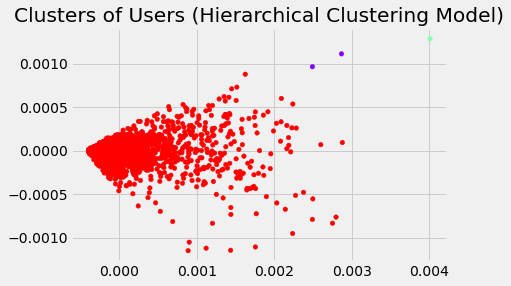

In [120]:
#4 Fitting hierarchical clustering to the buddymove dataset
# There are two algorithms for hierarchical clustering: Agglomerative Hierarchical Clustering and
# Divisive Hierarchical Clustering. We choose Euclidean distance and ward method for our
# algorithm class
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='single')

# Lets try to fit the hierarchical clustering algorithm  to dataset X while creating the
# clusters vector that tells for each users which cluster the users belongs to.

y_hc=hc.fit_predict(X)

#5 Visualizing the clusters. This code is similar to k-means visualization code.
#We only replace the y_kmeans vector name to y_hc for the hierarchical clustering

plt.scatter(X[:,0], X[:,1], c=hc.labels_, s=20, cmap='rainbow')
plt.title('Clusters of Users (Hierarchical Clustering Model)')

plt.show()

In [122]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X,y_hc)
print(score)

0.8455271335896125


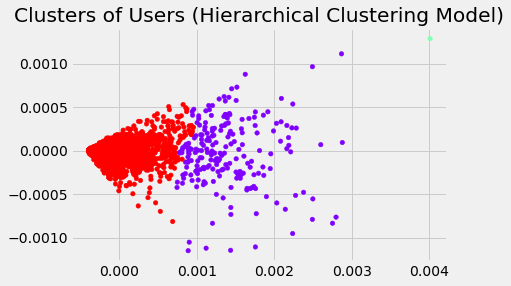

In [124]:
#4 Fitting hierarchical clustering to the buddymove dataset
# There are two algorithms for hierarchical clustering: Agglomerative Hierarchical Clustering and
# Divisive Hierarchical Clustering. We choose Euclidean distance and ward method for our
# algorithm class
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='complete')

# Lets try to fit the hierarchical clustering algorithm  to dataset X while creating the
# clusters vector that tells for each users which cluster the users belongs to.

y_hc=hc.fit_predict(X)

#5 Visualizing the clusters. This code is similar to k-means visualization code.
#We only replace the y_kmeans vector name to y_hc for the hierarchical clustering

plt.scatter(X[:,0], X[:,1], c=hc.labels_, s=20, cmap='rainbow')
plt.title('Clusters of Users (Hierarchical Clustering Model)')

plt.show()

In [125]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X,y_hc)
print(score)

0.7907896237798744


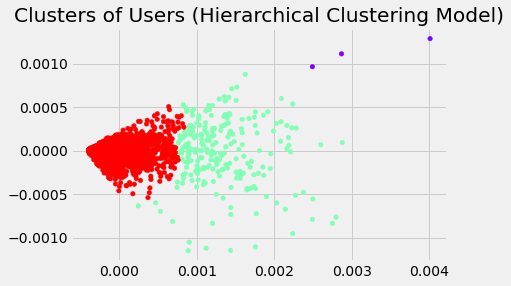

In [126]:
#4 Fitting hierarchical clustering to the buddymove dataset
# There are two algorithms for hierarchical clustering: Agglomerative Hierarchical Clustering and
# Divisive Hierarchical Clustering. We choose Euclidean distance and ward method for our
# algorithm class
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='average')

# Lets try to fit the hierarchical clustering algorithm  to dataset X while creating the
# clusters vector that tells for each users which cluster the users belongs to.

y_hc=hc.fit_predict(X)

#5 Visualizing the clusters. This code is similar to k-means visualization code.
#We only replace the y_kmeans vector name to y_hc for the hierarchical clustering

plt.scatter(X[:,0], X[:,1], c=hc.labels_, s=20, cmap='rainbow')
plt.title('Clusters of Users (Hierarchical Clustering Model)')

plt.show()

In [127]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X,y_hc)
print(score)

0.7867226982282924


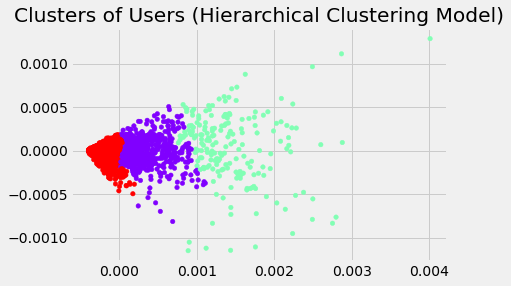

In [128]:
#4 Fitting hierarchical clustering to the buddymove dataset
# There are two algorithms for hierarchical clustering: Agglomerative Hierarchical Clustering and
# Divisive Hierarchical Clustering. We choose Euclidean distance and ward method for our
# algorithm class
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='ward')

# Lets try to fit the hierarchical clustering algorithm  to dataset X while creating the
# clusters vector that tells for each users which cluster the users belongs to.

y_hc=hc.fit_predict(X)

#5 Visualizing the clusters. This code is similar to k-means visualization code.
#We only replace the y_kmeans vector name to y_hc for the hierarchical clustering

plt.scatter(X[:,0], X[:,1], c=hc.labels_, s=20, cmap='rainbow')
plt.title('Clusters of Users (Hierarchical Clustering Model)')

plt.show()